In [1]:
!ls /mnt/data/physionet.org/files/ms-cxr/0.1/

convert_coco_json_to_csv.py  MS_CXR_Local_Alignment_v1.0.0.csv
index.html		     MS_CXR_Local_Alignment_v1.0.0.json
LICENSE.txt		     SHA256SUMS.txt


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/mnt/data/physionet.org/files/ms-cxr/0.1/MS_CXR_Local_Alignment_v1.0.0.csv')

In [5]:
len(df)

1448

In [4]:
df

,dicom_id,category_name,label_text,path,x,y,w,h,image_width,image_height
0,675d792f-a3521e48-5eec8573-1e81d644-e60c34f8,Pneumonia,Bibasilar opacities,files/p10/p10233088/s54276838/675d792f-a3521e4...,196,1136,532,315,1767,2021
1,675d792f-a3521e48-5eec8573-1e81d644-e60c34f8,Pneumonia,Bibasilar opacities,files/p10/p10233088/s54276838/675d792f-a3521e4...,1009,1134,491,350,1767,2021
2,5318d353-daae9c3d-2ee8648e-32b65198-aeff801e,Pneumonia,Bilateral multifocal areas of consolidation,files/p10/p10123147/s50230934/5318d353-daae9c3...,1510,1268,755,796,2539,3050
3,5318d353-daae9c3d-2ee8648e-32b65198-aeff801e,Pneumonia,Bilateral multifocal areas of consolidation,files/p10/p10123147/s50230934/5318d353-daae9c3...,454,690,637,670,2539,3050
4,4decce85-c6ede74e-7a8bc81c-e81edee9-5ec17116,Pneumothorax,Large right-sided pneumothorax,files/p10/p10500801/s58577720/4decce85-c6ede74...,265,90,880,2198,3056,2544
...,...,...,...,...,...,...,...,...,...,...
1443,18e1246d-a9c790ca-6b40ea18-81b9ccc8-3469c113,Pleural Effusion,Small bilateral pleural effusions,files/p15/p15445857/s50967054/18e1246d-a9c790c...,1057,1198,760,435,1950,1826
1444,f7e3f8a3-7299389e-84a7eb76-0cb81c79-06875895,Pleural Effusion,Persistent moderate-to-large bilateral pleural...,files/p12/p12668169/s54438962/f7e3f8a3-7299389...,322,972,1076,1239,2539,3050
1445,f7e3f8a3-7299389e-84a7eb76-0cb81c79-06875895,Pleural Effusion,Persistent moderate-to-large bilateral pleural...,files/p12/p12668169/s54438962/f7e3f8a3-7299389...,1755,907,748,1304,2539,3050
1446,0677ec27-61328435-0dfee3b9-356bfc03-8cbd3353,Pleural Effusion,Small bilateral pleural effusions are presumed,files/p13/p13859188/s52811469/0677ec27-6132843...,601,1515,998,412,3056,2544


In [6]:
df['path'][0]

'files/p10/p10233088/s54276838/675d792f-a3521e48-5eec8573-1e81d644-e60c34f8.jpg'

In [7]:
df.iloc[0]

dicom_id              675d792f-a3521e48-5eec8573-1e81d644-e60c34f8
category_name                                            Pneumonia
label_text                                     Bibasilar opacities
path             files/p10/p10233088/s54276838/675d792f-a3521e4...
x                                                              196
y                                                             1136
w                                                              532
h                                                              315
image_width                                                   1767
image_height                                                  2021
Name: 0, dtype: object

In [13]:
from importlib import reload
import medvqa

In [69]:
reload(medvqa.datasets.ms_cxr)

<module 'medvqa.datasets.ms_cxr' from '/home/pamessina/medvqa/medvqa/datasets/ms_cxr/__init__.py'>

In [70]:
from medvqa.datasets.ms_cxr import PhraseGroundingAnnotationsVisualizer, export_images_and_annotations_to_zip

In [71]:
pgav = PhraseGroundingAnnotationsVisualizer()

Image path: /mnt/data/mimic-cxr-jpg/images/p10/p10233088/s54276838/675d792f-a3521e48-5eec8573-1e81d644-e60c34f8.jpg
Label text: Bibasilar opacities
Category name: Pneumonia
x: 196, y: 1136, w: 532, h: 315


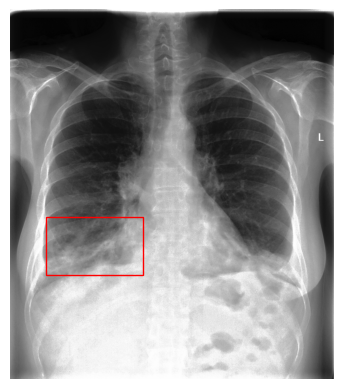

In [72]:
pgav.visualize_row(0)

Found 5 rows for dicom_id 2c84c825-2889fd51-2e46959d-586c6113-74033204
Label text: bilateral edema, consolidation, ground-glass opacities
Category name: Consolidation
x: 535, y: 307, w: 906, h: 1748
Label text: bilateral edema, consolidation, ground-glass opacities
Category name: Consolidation
x: 1699, y: 438, w: 998, h: 1699
Label text: bilateral edema, consolidation, ground-glass opacities
Category name: Edema
x: 535, y: 307, w: 906, h: 1748
Label text: bilateral edema, consolidation, ground-glass opacities
Category name: Edema
x: 1699, y: 438, w: 998, h: 1699
Label text: enlarged cardiac silhouette
Category name: Cardiomegaly
x: 1084, y: 1291, w: 1551, h: 822


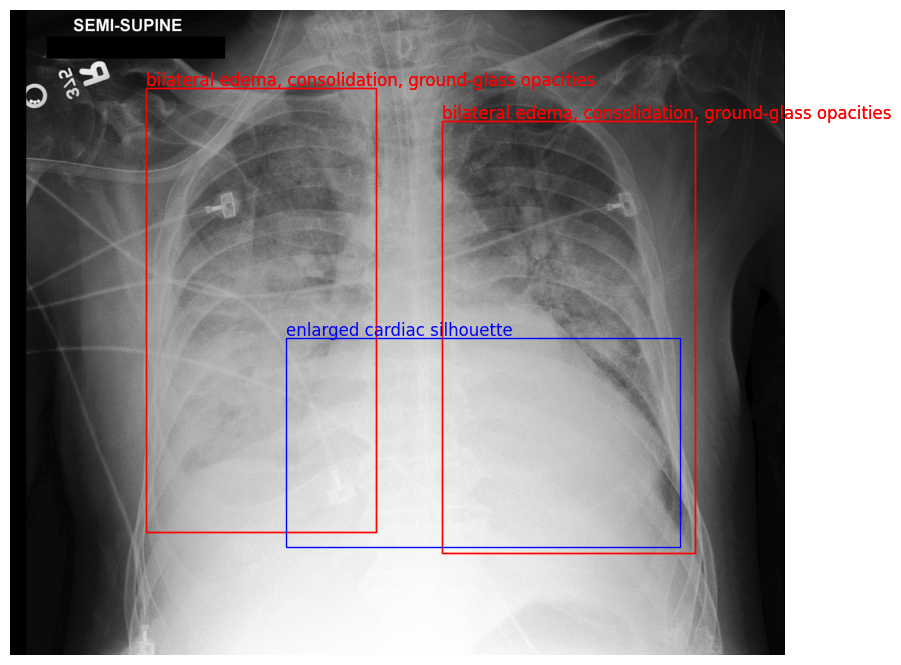

In [58]:
# pgav.visualize_dicom_id('675d792f-a3521e48-5eec8573-1e81d644-e60c34f8')
# pgav.visualize_dicom_id('4decce85-c6ede74e-7a8bc81c-e81edee9-5ec17116')
pgav.visualize_dicom_id('2c84c825-2889fd51-2e46959d-586c6113-74033204')

In [26]:
best_x = None
max_rows = 0
for x, rows in pgav.dicom_id_2_rows.items():
    if len(rows) > max_rows:
        max_rows = len(rows)
        best_x = x

In [27]:
best_x, max_rows

('2c84c825-2889fd51-2e46959d-586c6113-74033204', 5)

In [63]:
ls /home/pamessina/

 chexpert/                   radgraph_conllformat/
'Diplomado IALab 2020-1'/    radgraph_conllformat.tar.gz
 downloaded_binaries/        radiology_annotation_web_app/
 dygiepp/                    radiology_annotation_web_app_2/
 installers/                 tmp.jpg
 medvqa/                    'Tutorial NLG iHEALTH 2022-2'/
 medvqa-workspace/           venv/
 miniconda3/                 venv2/
 nltk_data/                  wheels/
 openai-quickstart-node/     YOLOv5/
 openai-quickstart-python/


In [73]:
export_images_and_annotations_to_zip('/home/pamessina/', 'ms_cxr_images_and_annotations.zip', num_images=100)

Images and annotations exported to ms_cxr_images_and_annotations.zip in /home/pamessina/
